<a href="https://colab.research.google.com/github/0in11/Python/blob/main/RNN/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('drive/MyDrive/DL202010821/RNN/')

%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

In [6]:
from custom_data import signal_one, signal_two, ko_review
from utils import plot_learning_curves, decode_imdb, sentence_to_vector

In [7]:
X_train, y_train, X_valid, y_valid, X_test, y_test = signal_one(50)

In [8]:
print(X_train.shape, y_train.shape)

(700, 50, 1) (700, 1)


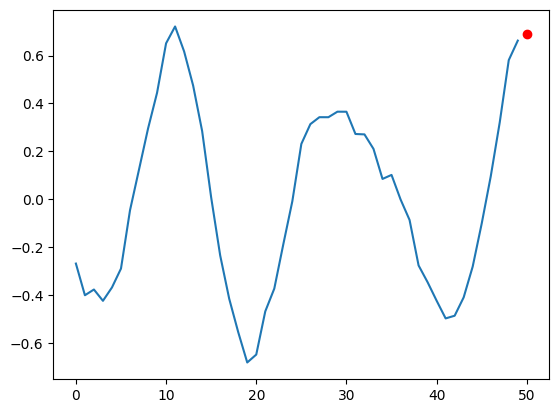

In [9]:
idx = 33
plt.plot(X_train[idx].flatten())
plt.scatter(50, y_train[idx], color = 'red')
plt.show()

In [10]:
rnn_model = Sequential([
        SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        SimpleRNN(20),
        Dense(1)
    ])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
22/22 [==============================] - 8s 158ms/step - loss: 0.2729 - val_loss: 0.1095
Epoch 2/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0627 - val_loss: 0.0355
Epoch 3/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0257 - val_loss: 0.0222
Epoch 4/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0167 - val_loss: 0.0146
Epoch 5/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 6/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 7/10
22/22 [==============================] - 2s 113ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 8/10
22/22 [==============================] - 3s 147ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 9/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 10/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0057 - val_loss: 0.0054


In [13]:
lstm_model = Sequential([
    ## 아래 모델 채우기 (RNN과 동일한 크기와 출력 사용)
          LSTM(20, return_sequences=True, input_shape=[None,1]),
          LSTM(20),
          Dense(1)
    ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 20)          1760      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5061 (19.77 KB)
Trainable params: 5061 (19.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
22/22 [==============================] - 4s 43ms/step - loss: 0.1257 - val_loss: 0.0971
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0691 - val_loss: 0.0527
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0471 - val_loss: 0.0461
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0422 - val_loss: 0.0434
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0404 - val_loss: 0.0427
Epoch 6/10
22/22 [==============================] - 0s 12ms/step - loss: 0.0397 - val_loss: 0.0393
Epoch 7/10
22/22 [==============================] - 0s 15ms/step - loss: 0.0377 - val_loss: 0.0387
Epoch 8/10
22/22 [==============================] - 0s 15ms/step - loss: 0.0367 - val_loss: 0.0370
Epoch 9/10
22/22 [==============================] - 0s 15ms/step - loss: 0.0327 - val_loss: 0.0327
Epoch 10/10
22/22 [==============================] - 0s 12ms/step - loss: 0.0292 - val_loss: 0.0275


In [14]:
gru_model = Sequential([
        ## 아래 모델 채우기 (RNN과 동일한 크기와 출력 사용)
        GRU(20, return_sequences=True, input_shape=[None,1]),
        GRU(20),
        Dense(1)
    ])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 20)          1380      
                                                                 
 gru_1 (GRU)                 (None, 20)                2520      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3921 (15.32 KB)
Trainable params: 3921 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
gru_history = gru_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
22/22 [==============================] - 5s 40ms/step - loss: 0.1447 - val_loss: 0.1108
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0863 - val_loss: 0.0546
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0389 - val_loss: 0.0279
Epoch 4/10
22/22 [==============================] - 0s 12ms/step - loss: 0.0289 - val_loss: 0.0250
Epoch 5/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0257 - val_loss: 0.0228
Epoch 6/10
22/22 [==============================] - 0s 12ms/step - loss: 0.0238 - val_loss: 0.0206
Epoch 7/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0216 - val_loss: 0.0187
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0192 - val_loss: 0.0162
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0171 - val_loss: 0.0144
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0148 - val_loss: 0.0124


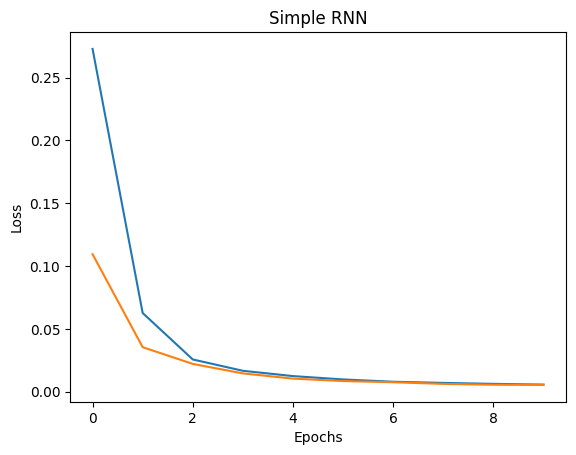

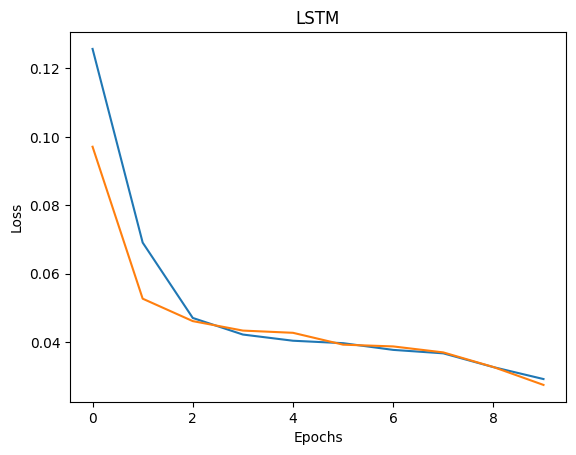

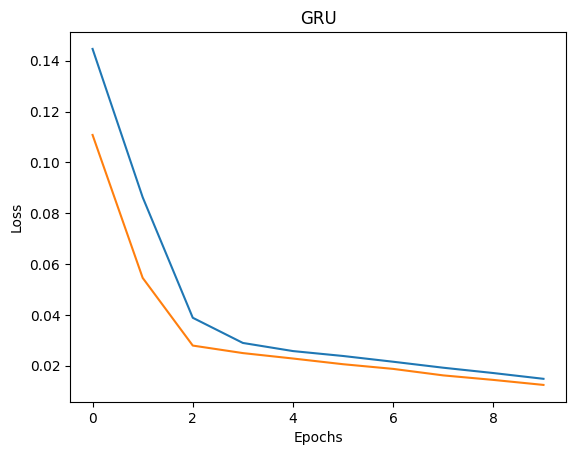

In [17]:
plot_learning_curves(rnn_history, "Simple RNN")
plot_learning_curves(lstm_history, "LSTM")
plot_learning_curves(gru_history, "GRU")

In [18]:
X_data, y_data = signal_two()

In [19]:
X_data.shape, y_data.shape

((2500, 100, 2), (2500,))

In [21]:
rnn_model = Sequential([
        ## hidden node 30개
        ## input size [100, 2]
        ## 2개 층 사용
        ## 마지막 출력층은 단일 출력
        SimpleRNN(30, return_sequences=True, input_shape=[100,2]),
        SimpleRNN(30),
        Dense(1)
    ])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

rnn_history = rnn_model.fit(X_data, y_data, epochs=100, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100, 30)           990       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2851 (11.14 KB)
Trainable params: 2851 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 13s 164ms/step - loss: 0.0778 - val_loss: 0.0549
Epoch 2/100
63/63 [==============================] - 11s 179ms/step - loss: 0.0492 - val_loss: 0.0507
Epoch 3/100
63/63 [==============================] - 12s 199ms/step - loss: 0.04

In [ ]:
plot_learning_curves(rnn_history, "Simple RNN")

In [25]:
lstm_model = Sequential([
        ## hidden node 30개
        ## input size [100, 2]
        ## 2개 층 사용
        ## 마지막 출력층은 단일 출력
        LSTM(30, return_sequences=True, input_shape=[100,2]),
        LSTM(30),
        LSTM(1)
    ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

lstm_history = lstm_model.fit(X_data, y_data, epochs=100, validation_split=0.2)

ValueError: Input 0 of layer "lstm_9" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 30)

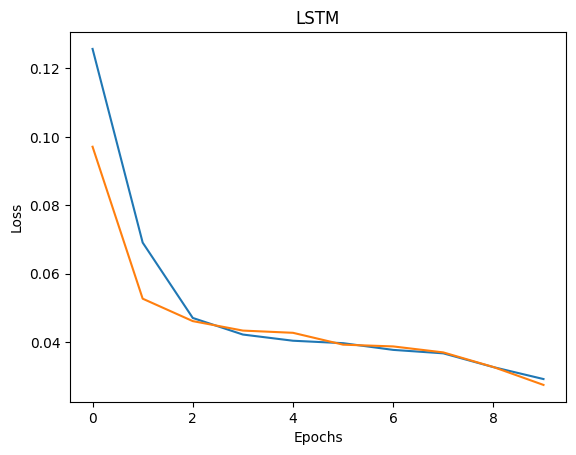

NameError: name 'plot' is not defined

In [28]:
plot_learning_curves(lstm_history, "LSTM")

In [24]:
gru_model = Sequential([
        ## hidden node 30개
        ## input size [100, 2]
        ## 2개 층 사용
        ## 마지막 출력층은 단일 출력
        GRU(30, return_sequences=True, input_shape=[100,2]),
        GRU(30),
        Dense(1)
    ])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()

gru_history = gru_model.fit(X_data, y_data, epochs=100, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 100, 30)           3060      
                                                                 
 gru_3 (GRU)                 (None, 30)                5580      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8671 (33.87 KB)
Trainable params: 8671 (33.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 5s 24ms/step - loss: 0.0490 - val_loss: 0.0485
Epoch 2/100
63/63 [==============================] - 1s 11ms/step - loss: 0.0477 - val_loss: 0.0484
Epoch 3/100
63/63 [==============================] - 1s 11ms/step - loss: 0.0476 - v

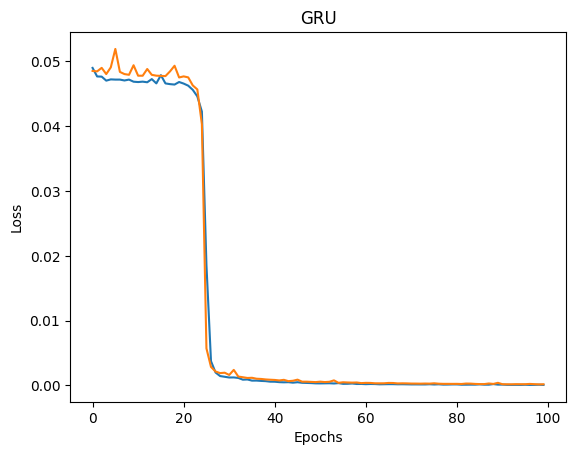

In [26]:
plot_learning_curves(gru_history, "GRU")

# 영화 리뷰 학습 후 긍정/부정 구분하기

In [35]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from utils import decode_imdb, sentence_to_vector

In [30]:
# 데이터셋 로드
max_features = 10000  # 사용할 단어의 최대 개수
max_len = 500  # 패딩할 시퀀스의 최대 길이

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

print(X_train[4])

17464789/17464789 [==============================] - 0s 0us/step
[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, 33, 2401, 18, 457, 88, 13, 2626, 1400, 45, 3171, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 1696, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2359, 5, 13, 16, 131, 2073, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 1513, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 1543, 52, 725, 6397, 61, 419, 11, 13, 1571, 15, 1543, 20, 11, 4, 2, 5, 296, 12, 3524, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2167, 1272, 7, 2601, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 3171, 18, 165, 170, 143, 19, 14, 5, 7224, 6, 226, 251, 7, 61, 113]


In [32]:
decoded_review = decode_imdb(X_train[4])
print(decoded_review)

the sure themes br only acting i i was favourite as on she they hat but already most was scares minor if flash was well also good 8 older was with enjoy used enjoy phone too i'm of you an job br only women than robot to was with these unexpected sure little sure guy sure on was one your life was children in particularly only yes she sort is jerry but so stories them final known to have does such most that supposed imagination very moving antonioni only yes this was seconds for imagination on this of and to plays that nights to for supposed still been last fan always your bit that strong said clean knowing br theory to car masterpiece out in also show for film's was tale have flash but look part i'm film as to penelope is script hard br only acting


In [33]:
# 시퀀스 패딩
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [34]:
X_train[4] #뒷부분이 중요하므로 앞에다가 padding

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [37]:
nlp_model = Sequential([
    ## 1. 임베딩 벡터 input_dim=max_features, output_dim = 128, input_length=max_len
    ## 2. LSTM hidden layer 64개
    ## 3. Dense 출력 1개, activation은 sigmoid
    Embedding(input_dim = max_features, output_dim = 128, input_length = max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation = 'sigmoid')  #단일 출력이므로 시그모이드 사용
])

nlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nlp_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm_10 (LSTM)              (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
nlp_history = nlp_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 42s 126ms/step - loss: 0.4419 - accuracy: 0.7930 - val_loss: 0.3463 - val_accuracy: 0.8564
Epoch 2/5
313/313 [==============================] - 23s 74ms/step - loss: 0.2435 - accuracy: 0.9067 - val_loss: 0.3122 - val_accuracy: 0.8764
Epoch 3/5
313/313 [==============================] - 15s 49ms/step - loss: 0.2018 - accuracy: 0.9190 - val_loss: 0.3880 - val_accuracy: 0.8582
Epoch 4/5
313/313 [==============================] - 12s 39ms/step - loss: 0.1605 - accuracy: 0.9413 - val_loss: 0.3868 - val_accuracy: 0.8650
Epoch 5/5
313/313 [==============================] - 10s 33ms/step - loss: 0.1200 - accuracy: 0.9568 - val_loss: 0.4389 - val_accuracy: 0.8632


In [39]:
test_loss, test_acc = nlp_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

782/782 [==============================] - 8s 10ms/step - loss: 0.4548 - accuracy: 0.8607
Test Accuracy: 0.8607


In [40]:
encode_test_sentence = sentence_to_vector('hate the movie')
encode_test_sentence = pad_sequences(encode_test_sentence, maxlen=max_len)

nlp_model.predict(encode_test_sentence)

[781, 1, 17]
1/1 [==============================] - 0s 376ms/step


array([[0.33859372]], dtype=float32)

# 네이버 영화 리뷰 해보기 (한글 리뷰)

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
import pandas as pd

In [42]:
# 데이터셋 로드
train_data,test_data = ko_review()

# 데이터 확인
train_data.head()

4893335/4893335 [==============================] - 0s 0us/step


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [43]:
# Null 값 제거
train_data = train_data.dropna(how='any')
test_data = test_data.dropna(how='any')

# 특수 문자 제거 및 단어로 쪼개기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['document'] = [sentence.split(' ') for sentence in train_data['document']]
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = [sentence.split(' ') for sentence in test_data['document']]

# 토큰화 및 패딩
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_data['document'])

X_train = tokenizer.texts_to_sequences(train_data['document'])
X_test = tokenizer.texts_to_sequences(test_data['document'])

y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

<ipython-input-43-20b8bb959da3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
max_len = 25
X_train = pad_sequences(X_train,padding='post', maxlen=max_len)
X_test = pad_sequences(X_test,padding='post', maxlen=max_len)

In [ ]:
print(X_train[:3])

[[   50     4 10484  1064     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 6403     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [ ]:
nlp_model = Sequential([
    ## 1. 임베딩 벡터 input_dim=20000, output_dim = 300, input_length=max_len
    ## 2. LSTM hidden layer 64개
    ## 3. Dense 출력 1개, activation은 sigmoid
])

nlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nlp_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                93440     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6093505 (23.24 MB)
Trainable params: 6093505 (23.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nlp_history = nlp_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1875/1875 [==============================] - 50s 24ms/step - loss: 0.4854 - accuracy: 0.7439 - val_loss: 0.4332 - val_accuracy: 0.7828
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3736 - accuracy: 0.8098 - val_loss: 0.4342 - val_accuracy: 0.7849
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3175 - accuracy: 0.8333 - val_loss: 0.4706 - val_accuracy: 0.7784
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2752 - accuracy: 0.8515 - val_loss: 0.5298 - val_accuracy: 0.7695
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2401 - accuracy: 0.8675 - val_loss: 0.5783 - val_accuracy: 0.7693


In [ ]:
test_loss, test_acc = nlp_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

1563/1563 [==============================] - 6s 4ms/step - loss: 0.5869 - accuracy: 0.7600
Test Accuracy: 0.7600


In [ ]:
test_sentence = '재밌다가 나중엔 너무 졸리고 지루했다'
# test_sentence = '지루할 줄 알았는데 너무 재밌었다'

test_sentence = test_sentence.split(' ')
test_sentences =[]
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding = 'post', maxlen=max_len)
prediction = nlp_model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

1/1 [==============================] - 0s 37ms/step
['재밌다가']
[0.48243514]
['재밌다가', '나중엔']
[0.44020212]
['재밌다가', '나중엔', '너무']
[0.45340818]
['재밌다가', '나중엔', '너무', '졸리고']
[0.5175926]
['재밌다가', '나중엔', '너무', '졸리고', '지루했다']
[0.0011311]
